WHY is the new FBEYE data so much more numerous than the old Appaloosa? Is it just the small flares?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightkurve as lk
from astropy.table import Table
from scipy.stats import binned_statistic
# from scipy.signal import savgol_filter
# from scipy.interpolate import CubicSpline

from stuff import *
# import exoplanet as xo

from glob import glob

import sys
sys.path.append('/Users/james/Dropbox/research_projects/FFD/')
from FFD import FFD

/Users/james/anaconda3/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/james/.lightkurve/cache. Please move all the files in the legacy directory /Users/james/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [5]:
fbeye0 = glob('../flare_cycles-master/candidate_star/008507979/*.flare')
fbeye0

['../flare_cycles-master/candidate_star/008507979/kplr008507979-2013011073258_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2012179063303_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2012004120508_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2013131215648_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2012088054726_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2013098041711_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2009350155506_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2010174085026_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2010265121752_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/kplr008507979-2010078095331_llc.fits.flare',
 '../flare_cycles-master/candidate_star/008507979/

1519 384


/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/698755703.py:11: RuntimeWarning: invalid value encountered in log10
  ffdx = np.log10(np.sort(ffdx))
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/698755703.py:13: RuntimeWarning: divide by zero encountered in log10
  ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/698755703.py:14: RuntimeWarning: divide by zero encountered in log10
  ffdy68 = np.log10(np.arange(len(ffdx68)) / totdur)[::-1]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/698755703.py:11: RuntimeWarning: invalid value encountered in log10
  ffdx = np.log10(np.sort(ffdx))
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/698755703.py:13: RuntimeWarning: divide by zero encountered in log10
  ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/698755703.py:14: RuntimeWarning:

Text(0, 0.5, 'log #/day')

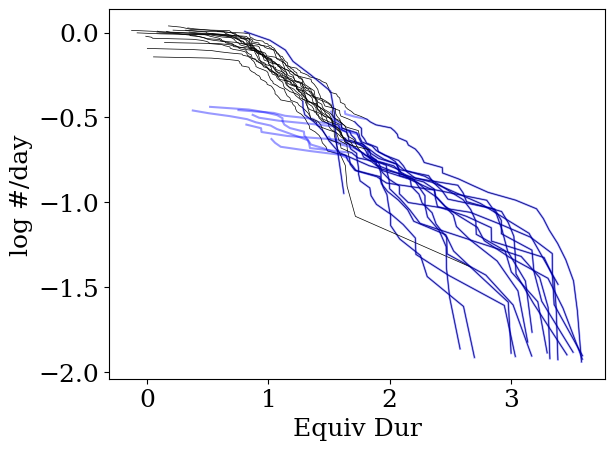

In [48]:
anames = ['t_start','t_stop','t_peak','amplitude','FWHM','duration','t_peak_aflare1','t_FWHM_aflare1','amplitude_aflare1','flare_chisq','KS_d_model','KS_p_model','KS_d_cont','KS_p_cont','Equiv_Dur','ED68i','ED90i']
# pd.read_csv(fbeye0[0], comment='#', names=anames)
# float(open(fbeye0[0]).readlines()[5][24:-2])
howmany = 0
howmany68 = 0
for k in range(len(fbeye0)):
    totdur = float(open(fbeye0[k]).readlines()[5][24:-2])
    df = pd.read_csv(fbeye0[k], comment='#', names=anames)
    ffdx = df['Equiv_Dur'].values
    ffdx68 = df['Equiv_Dur'][df['Equiv_Dur'] > df['ED68i']].values
    ffdx = np.log10(np.sort(ffdx))
    ffdx68 = np.log10(np.sort(ffdx68))
    ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
    ffdy68 = np.log10(np.arange(len(ffdx68)) / totdur)[::-1]

    plt.plot(ffdx, ffdy, c='k', lw=0.5)
    plt.plot(ffdx68, ffdy68, c='b', lw=1.5, alpha=0.4)
    # print(len(ffdx))
    howmany += len(ffdx)
    howmany68 += sum(df['Equiv_Dur'] > df['ED68i'])
print(howmany, howmany68)
plt.xlabel('Equiv Dur')
plt.ylabel('log #/day')

In [32]:
fbeye = glob('../fbeye/*.fbeye')

cnames = ['Event_ID', 'Start_INDX', 'Stop_INDX', 
          't_peak', 't_start', 't_stop', 't_rise', 't_decay', 
          'Flux_peak', 'Equiv_Dur', 'S/N', 'CPLX_flg',
          'MLTPK_flg', 'MLTPK_num', 't_MLTPK', 'L_mltpk', 'MLTPK_INDX', 'quies', 'sc']

ff = pd.read_table(fbeye[0], skiprows=11, names = cnames, delim_whitespace=True)

/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_projects/FFD/FFD.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ED[ss]) + Lum
/Users/james/Dropbox/research_proj

Text(0, 0.5, 'log Flare Rate (per day)')

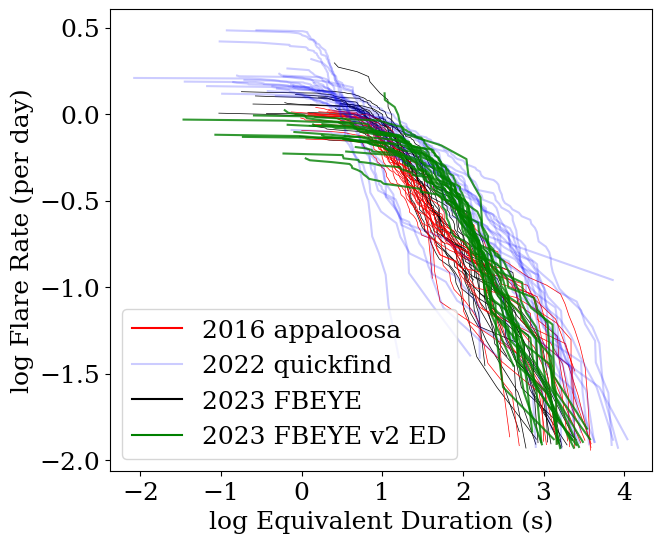

In [43]:
# EquivDur

plt.figure(figsize=(7,6))
for k in range(len(fbeye)):
    ff = pd.read_table(fbeye[k], skiprows=11, names = cnames, delim_whitespace=True)
    lc = pd.read_csv(fbeye[k][:-6], names=['t','f','e'])

    TOTEXP = np.nanmedian(np.diff(lc['t'])) * len(lc)
    ffd_x, ffd_y, ffd_xerr, ffd_yerr = FFD(ff['Equiv_Dur'].values, TOTEXP=TOTEXP, 
                                           Lum=0., fluxerr=np.nanmedian(lc['e']), 
                                           dur = ff['t_stop'] - ff['t_start'])
    plt.plot(ffd_x, ffd_y, c='k', lw=0.5)
#     plt.scatter(np.nanmedian(lc['t']), np.log10(np.sum(ff['Equiv_Dur'].values) / (TOTEXP*86400)))


for k in range(len(fbeye0)):
    totdur = float(open(fbeye0[k]).readlines()[5][24:-2])
    df = pd.read_csv(fbeye0[k], comment='#', names=anames)
    ffdx = df['Equiv_Dur'].values
    ffdx68 = df['Equiv_Dur'][df['Equiv_Dur'] > df['ED68i']].values
    ffdx = np.log10(np.sort(ffdx))
    ffdx68 = np.log10(np.sort(ffdx68))
    ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
    ffdy68 = np.log10(np.arange(len(ffdx68)) / totdur)[::-1]

    plt.plot(ffdx, ffdy, c='r', lw=0.5)

files = glob('../data/KIC_8507979*') 

lfl_lbol = np.zeros(len(files))
lfl_lbol_err = np.zeros(len(files))
time = np.zeros(len(files))
for k in range(len(files)):
    df = pd.read_csv(files[k])
    totdur = 1 / (10**df['ffd_y'].values[0])
    plt.plot(df['ffd_x'], df['ffd_y'], c='b', alpha=0.2)

files = glob('../fbeye/*_C.csv')
for k in range(len(files)):
    df = pd.read_csv(files[k])
    plt.plot(df['ffd_x'], df['ffd_y'], c='g', alpha=0.8)

plt.plot([],[], c='r', label='2016 appaloosa')
plt.plot([],[], c='b', label='2022 quickfind', alpha=0.2)
plt.plot([],[], c='k', label='2023 FBEYE')
plt.plot([],[], c='g', label='2023 FBEYE v2 ED')

plt.legend()
plt.xlabel('log Equivalent Duration (s)')
plt.ylabel('log Flare Rate (per day)')


/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/1765500369.py:18: RuntimeWarning: invalid value encountered in log10
  ffdx = np.log10(np.sort(ffdx))
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/1765500369.py:20: RuntimeWarning: divide by zero encountered in log10
  ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/1765500369.py:21: RuntimeWarning: divide by zero encountered in log10
  ffdy68 = np.log10(np.arange(len(ffdx68)) / totdur)[::-1]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/1765500369.py:18: RuntimeWarning: invalid value encountered in log10
  ffdx = np.log10(np.sort(ffdx))
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/1765500369.py:20: RuntimeWarning: divide by zero encountered in log10
  ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_63096/1765500369.py:21: RuntimeWa

Text(0, 0.5, 'log Flare Rate (per day)')

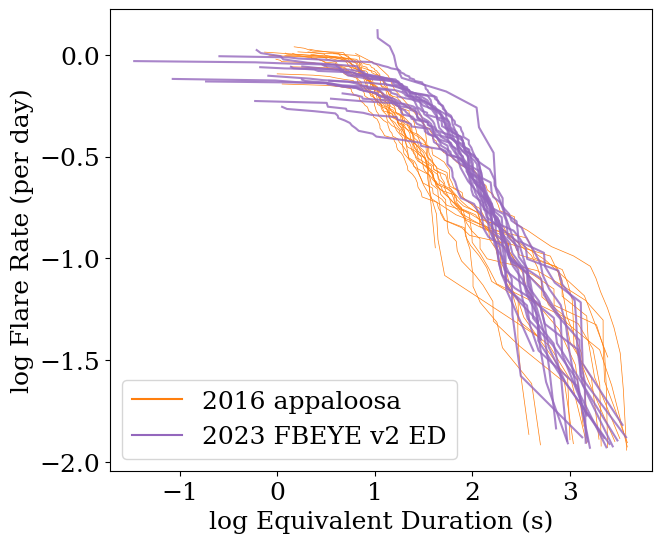

In [51]:
plt.figure(figsize=(7,6))
# for k in range(len(fbeye)):
#     ff = pd.read_table(fbeye[k], skiprows=11, names = cnames, delim_whitespace=True)
#     lc = pd.read_csv(fbeye[k][:-6], names=['t','f','e'])

#     TOTEXP = np.nanmedian(np.diff(lc['t'])) * len(lc)
#     ffd_x, ffd_y, ffd_xerr, ffd_yerr = FFD(ff['Equiv_Dur'].values, TOTEXP=TOTEXP, 
#                                            Lum=0., fluxerr=np.nanmedian(lc['e']), 
#                                            dur = ff['t_stop'] - ff['t_start'])
#     plt.plot(ffd_x, ffd_y, c='C0', lw=0.5)


for k in range(len(fbeye0)):
    totdur = float(open(fbeye0[k]).readlines()[5][24:-2])
    df = pd.read_csv(fbeye0[k], comment='#', names=anames)
    ffdx = df['Equiv_Dur'].values
    ffdx68 = df['Equiv_Dur'][df['Equiv_Dur'] > df['ED68i']].values
    ffdx = np.log10(np.sort(ffdx))
    ffdx68 = np.log10(np.sort(ffdx68))
    ffdy = np.log10(np.arange(len(ffdx)) / totdur)[::-1]
    ffdy68 = np.log10(np.arange(len(ffdx68)) / totdur)[::-1]

    plt.plot(ffdx, ffdy, c='C1', lw=0.5)

# files = glob('../data/KIC_8507979*') 

# lfl_lbol = np.zeros(len(files))
# lfl_lbol_err = np.zeros(len(files))
# time = np.zeros(len(files))
# for k in range(len(files)):
#     df = pd.read_csv(files[k])
#     totdur = 1 / (10**df['ffd_y'].values[0])
#     plt.plot(df['ffd_x'], df['ffd_y'], c='C2', alpha=0.2)

files = glob('../fbeye/*_C.csv')
for k in range(len(files)):
    df = pd.read_csv(files[k])
    plt.plot(df['ffd_x'], df['ffd_y'], c='C4', alpha=0.8)

# plt.plot([],[], c='b', label='2022 quickfind', alpha=0.2)
plt.plot([],[], c='C1', label='2016 appaloosa')
# plt.plot([],[], c='k', label='2023 FBEYE')
plt.plot([],[], c='C4', label='2023 FBEYE v2 ED')

plt.legend()
plt.xlabel('log Equivalent Duration (s)')
plt.ylabel('log Flare Rate (per day)')


In [101]:
times = np.zeros(len(files))
count = np.zeros(len(files))
alpha = np.zeros(len(files))
beta = np.zeros(len(files))
R25 = np.zeros(len(files))
lfllbol = np.zeros(len(files))

for k in range(len(files)):
    df = pd.read_csv(files[k])
    lc = pd.read_csv(files[k][:-12], names=['t','f','e'])
    TOTEXP = np.nanmedian(np.diff(lc['t'])) * len(lc) 

    fok = np.isfinite(df['ffd_x']) & np.isfinite(df['ffd_y']) & (df['ffd_x'] > 1.5)
    fit = np.polyfit(df['ffd_x'].values[fok], df['ffd_y'].values[fok], 1)
    beta[k] = fit[0]
    alpha[k] = fit[1]
    R25[k] = np.polyval(fit, 2.5)

    count[k] = len(df) / TOTEXP
    times[k] = np.nanmedian(lc['t'].values)
    lfllbol[k] = np.nansum(df['ED'].values) /TOTEXP
    

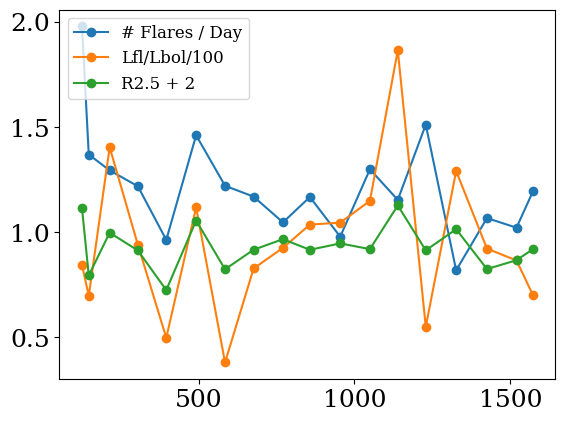

In [105]:
ss = np.argsort(times)
plt.plot(times[ss], count[ss], '-o',label='# Flares / Day')
plt.plot(times[ss], lfllbol[ss]/100, '-o',label='Lfl/Lbol/100')
plt.plot(times[ss], R25[ss]+2, '-o',label='R2.5 + 2')

plt.legend(fontsize=12,loc=2)

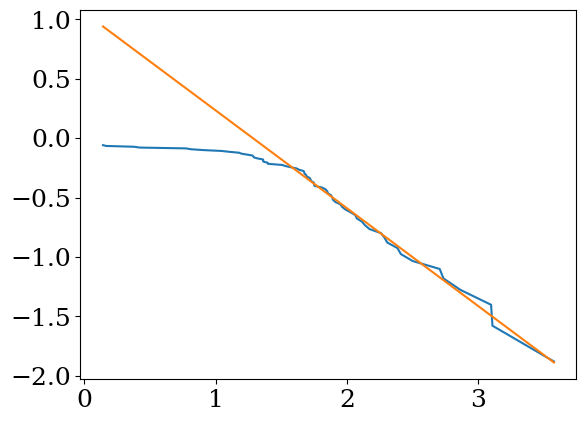

In [91]:
plt.plot(df['ffd_x'], df['ffd_y'])
fok = np.isfinite(df['ffd_x']) & np.isfinite(df['ffd_y']) & (df['ffd_x'] > 1.5)
fit = np.polyfit(df['ffd_x'].values[fok], df['ffd_y'].values[fok], 1)
plt.plot(df['ffd_x'].values, np.polyval(fit, df['ffd_x'].values))